#### numpy

- column_stack() 함수는 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결합니다.

In [2]:
import numpy as np

fish_length = np.array([25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0])
fish_weight = np.array([242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9])

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [4]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### train_test_split()
- 훈련 데이터를 훈련 세트와 테스트 세트로 나누는 함수입니다.
- 테스트 세트로 나눌 비율은 test_size 매개변수에서 지정할 수 있으며, 기본값은 0.25(25%)입니다.
- shuffle 매개변수로 훈련 세트와 테스트 세트로 나누기 전에 무작위로 섞을지 여부를 결정할 수 있습니다. 기본값은 True
- stratify 매개변수에 클래스 레이블이 담긴 배열(일반적으로 타깃 데이터)을 전달하면 클래스 비율에 맞게 훈련 세트와 테스트 세트를 나눕니다.

In [5]:
from sklearn.model_selection import train_test_split

In [13]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42, test_size=0.25 ,stratify = fish_target
)

In [15]:
#train_input[:10]
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [18]:
kn.fit(train_input, train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
kn.score(test_input, test_target)

1.0

In [21]:
kn.predict([[30,890],[10,12]])

array([1., 0.])

In [ ]:
kn.predict([[25,150]]) # 도미 - 25cm 150g

array([0.])

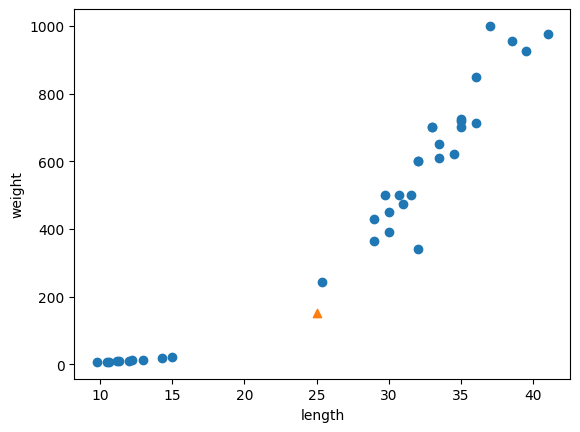

In [23]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') # ^ : 삼각 || D : 다이아몬드
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [24]:
train_input[:5]

array([[ 29.7, 500. ],
       [ 12.2,  12.2],
       [ 33. , 700. ],
       [ 11.3,   8.7],
       [ 39.5, 925. ]])

In [25]:
mean = np.mean(train_input, axis=0) # 행별(특성별) 평균
std = np.std(train_input, axis=0) # 행별(특성별) 표준 편차

In [27]:
train_scaled=(train_input - mean) / std # 표준 점수
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [28]:
kn.fit(train_scaled, train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [29]:
fish = np.array([[25, 150]])
fish_scaled = (fish - mean) / std
fish_scaled

array([[-0.23012627, -0.94060693]])

In [30]:
kn.predict(fish_scaled)

array([1.])

In [34]:
distances, indexes = kn.kneighbors(fish_scaled)
indexes

array([[21, 14, 34, 32,  5]])

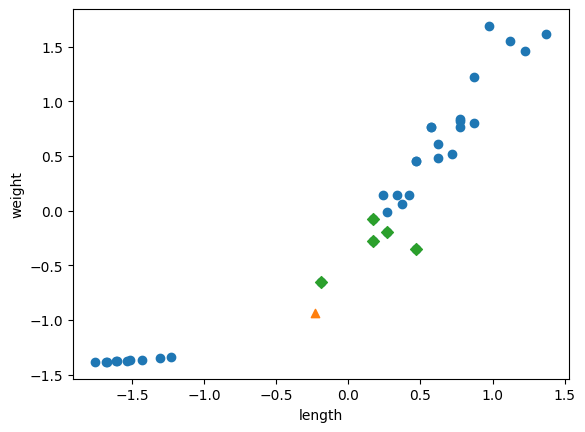

In [35]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(fish_scaled[0][0], fish_scaled[0][1], marker='^')
plt.scatter(train_scaled[indexes, 0],train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()